# Projeto 1 - Backtest modelo de investimento Magic Formula.


### Desafio:

* Testar se a regra de investimento da fórmula mágica, do Joel Grenblatt, funcionou no Brasil nos últimos anos.


### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Baixar os dados disponibilizados.
   
   **Passo 3** - Calcular os retornos mensais das empresas
   
   **Passo 4** - Filtrar  a liquidez.
   
   **Passo 5** - Criar o ranking dos indicadores.
   
   **Passo 6** - Criar as carteiras. 
   
   **Passo 7** - Calcular a rentabilidade por carteira.
   
   **Passo 8** - Calcular a rentabilidade do modelo.

   **Passo 9** - Calcular a rentabilidade do ibovespa no mesmo período.

   
   ##### **Passo 10** - Analisar os resultados.
   
-------------------

# Passo 1: Importando os módulos necessários

In [1]:
#!pip install quantstats

In [2]:
import pandas as pd
import quantstats as qs 

# Passo 2: Baixar os dados dispobinilizados.

In [3]:
dados_empresas = pd.read_csv("dados_empresas.csv")

# Passo 3: Calcular os retornos mensais das empresas.

In [4]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1) 

# Passo 4: Filtrar a liquidez.

In [5]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

# Passo 5: Criar o ranking dos indicadores.

In [6]:
dados_empresas['ranking_ev_ebit'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)

dados_empresas['ranking_final'] = dados_empresas['ranking_ev_ebit'] + dados_empresas['ranking_roic']
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

In [7]:
dados_empresas[dados_empresas['data'] == '2017-06-30'].sort_values('ranking_final').head(20)

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
46656,2017-06-30,TRPL4,9.03,17445326.0,0.688026,0.439928,0.085271,1.0,2.0,1.0
5114,2017-06-30,BRKM5,26.37,52655453.0,0.217985,0.277918,0.091013,6.0,5.0,2.0
16577,2017-06-30,ELET6,12.31,22895921.0,0.439335,0.158306,0.015435,3.5,15.5,3.5
16299,2017-06-30,ELET3,10.43,48245708.0,0.439335,0.158306,0.084372,3.5,15.5,3.5
9262,2017-06-30,CGAS5,21.40,1618220.0,0.172029,0.156184,0.021028,9.0,17.0,5.0
45403,2017-06-30,TIET11,10.74,21314208.0,0.120248,0.174229,0.029795,22.0,12.0,6.0
15883,2017-06-30,EGIE3,17.24,29171621.0,0.106889,0.188912,0.031903,27.0,10.0,7.0
25216,2017-06-30,ITSA4,4.44,89963145.0,0.124505,0.154357,0.024775,20.0,18.0,8.5
1186,2017-06-30,ALSC3,14.76,7997519.0,0.100269,0.211149,0.114499,30.0,8.0,8.5
40507,2017-06-30,SEER3,20.64,22655182.0,0.097003,0.214553,0.044574,33.0,7.0,11.0


# Passo 6: Criar  as carteiras. 

In [8]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]

# Passo 7: Calcular a rentabilidade por carteira.

In [9]:
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()

# Passo 8: Calcular a rentabilidade do modelo.

In [10]:
rentabilidade_por_carteiras['Magic Formula'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1

rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)

rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()

# Passo 9: Calcular a rentabilidade do ibovespa no mesmo período.

In [11]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['Ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

# Passo 10: Analisar os resultados.

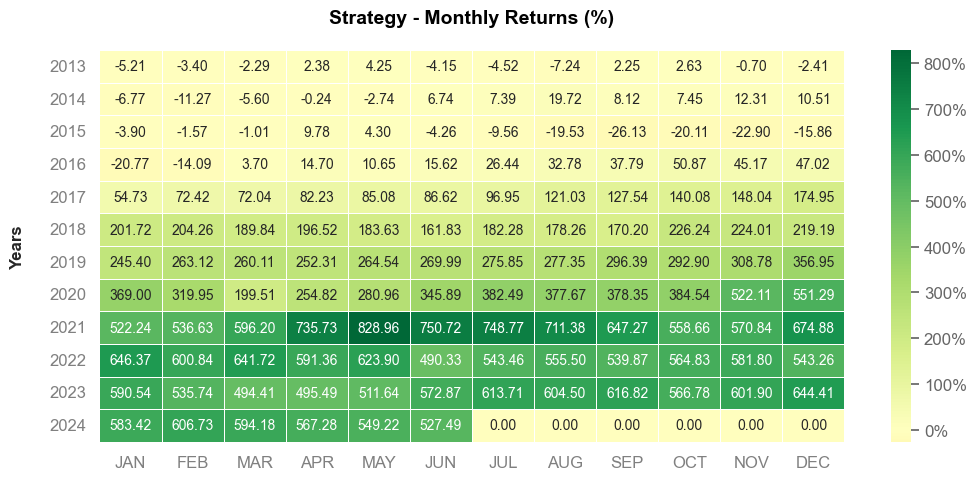

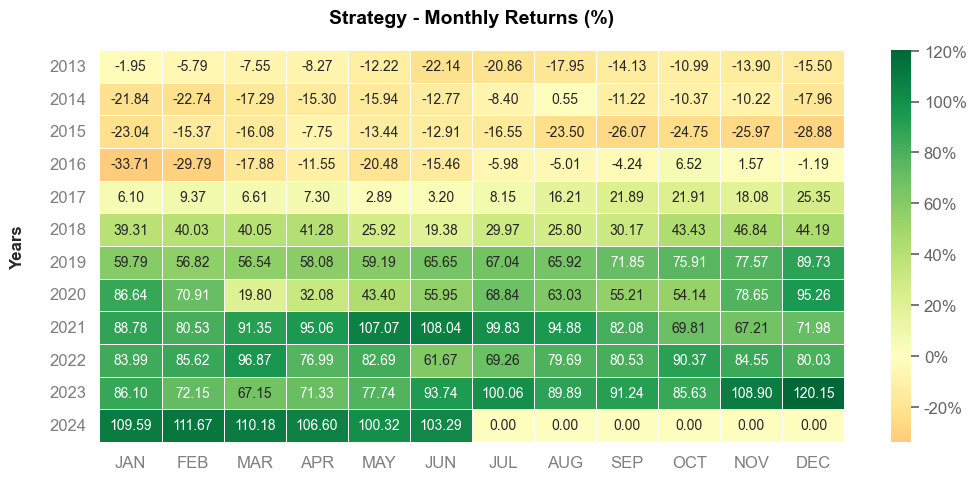

In [12]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['Magic Formula'].plot_monthly_heatmap()
rentabilidade_por_carteiras['Ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

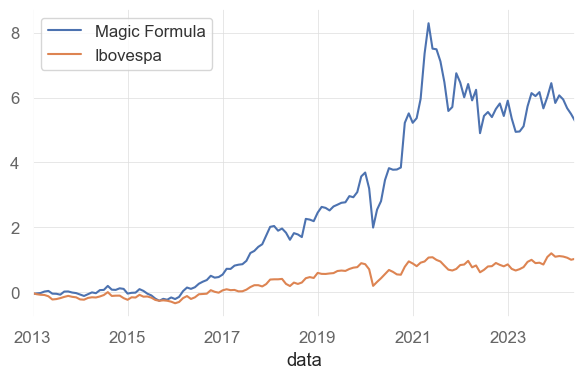

In [13]:
rentabilidade_por_carteiras.plot(figsize = (7, 4))